In [ ]:
# Now that you've learned about summarizing information with data visualization and handling missing data with imputation, it's time to apply these skills to a real-world case. 

# With the summary and dataset from the previous section (Getting Started with the Case Study), your first challenge is to:

# Investigate the extent and nature of the missing data 

# Design and implement an imputation technique for the missing data

# Produce a visualization for AAVAIL stakeholders on the US and Singapore markets using your modified dataset



In [1]:
! pip install matplotlib seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 5.2 MB/s  0:00:01 eta 0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 4.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 7.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [seaborn]m7/8 [seaborn]ib]


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("../data/aavail-data-visualization.csv")
df


,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams
0,1,united_states,21.0,Kasen Todd,True,aavail_premium,23.0
1,2,singapore,31.0,Ensley Garza,False,NaN,12.0
2,3,united_states,22.0,Lillian Carey,False,aavail_premium,22.0
3,4,united_states,21.0,Beau Christensen,True,aavail_basic,19.0
4,5,singapore,22.0,Ernesto Gibson,True,aavail_premium,23.0
...,...,...,...,...,...,...,...
995,996,singapore,55.0,Peyton Enriquez,False,aavail_unlimited,14.0
996,997,united_states,23.0,Amina Manning,True,aavail_basic,24.0
997,998,united_states,25.0,Brooks Ventura,True,aavail_unlimited,17.0
998,999,united_states,40.0,Nayeli Mathis,True,aavail_unlimited,16.0


In [133]:
df.isna().sum()

customer_id         0
country_name        0
age                 0
customer_name       0
is_subscriber       0
subscriber_type    72
num_streams        46
dtype: int64

In [134]:
df.isna().mean()*100

customer_id        0.0
country_name       0.0
age                0.0
customer_name      0.0
is_subscriber      0.0
subscriber_type    7.2
num_streams        4.6
dtype: float64

In [135]:
df[df["subscriber_type"].isna()]

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams
1,2,singapore,31.0,Ensley Garza,False,NaN,12.0
17,18,singapore,45.0,Zayne Torres,False,NaN,17.0
51,52,united_states,44.0,Lindsey Curry,True,NaN,22.0
74,75,united_states,30.0,Genesis Weaver,True,NaN,6.0
75,76,united_states,22.0,Mabel Miranda,True,NaN,22.0
...,...,...,...,...,...,...,...
872,873,united_states,24.0,Amaris Rice,True,NaN,23.0
882,883,united_states,20.0,Milo Wiggins,True,NaN,22.0
943,944,united_states,24.0,Cadence Holland,True,NaN,18.0
981,982,singapore,24.0,Cassandra Guerrero,True,NaN,18.0


In [136]:
df["subscriber_type"].value_counts(dropna=False).head(10)

subscriber_type
aavail_basic        339
aavail_premium      313
aavail_unlimited    276
NaN                  72
Name: count, dtype: int64

In [137]:
df["num_streams"].value_counts(dropna=False)

num_streams
20.0    107
22.0     95
19.0     91
18.0     91
21.0     89
17.0     75
23.0     54
16.0     53
NaN      46
14.0     38
15.0     37
13.0     31
12.0     25
24.0     24
25.0     24
10.0     23
8.0      18
9.0      16
11.0     15
5.0      11
6.0       9
7.0       7
26.0      5
4.0       5
27.0      4
1.0       2
3.0       2
29.0      1
28.0      1
2.0       1
Name: count, dtype: int64

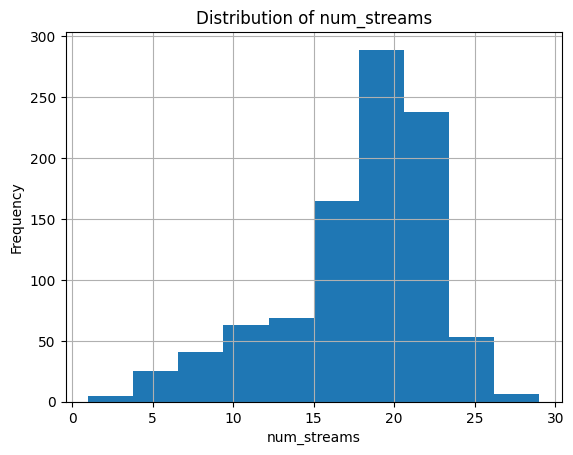

In [138]:
df_ns_before = df["num_streams"].hist(bins = 10)
plt.xlabel("num_streams")
plt.ylabel("Frequency")
plt.title("Distribution of num_streams")
plt.show()


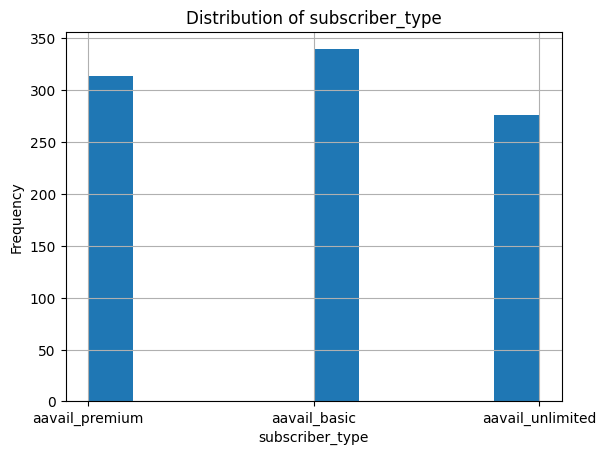

In [139]:
df_st_before = df["subscriber_type"].hist(bins = 10)
plt.xlabel("subscriber_type")
plt.ylabel("Frequency")
plt.title("Distribution of subscriber_type")
plt.show()

In [140]:
df["subscriber_type"].describe()

count              928
unique               3
top       aavail_basic
freq               339
Name: subscriber_type, dtype: object

In [141]:
df["num_streams"].describe()

count    954.000000
mean      17.780922
std        4.752115
min        1.000000
25%       15.000000
50%       19.000000
75%       21.000000
max       29.000000
Name: num_streams, dtype: float64

In [142]:
df['subscriber_type_missing'] = df['subscriber_type'].isna()
df['num_streams_missing'] = df['num_streams'].isna()
df

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams,subscriber_type_missing,num_streams_missing
0,1,united_states,21.0,Kasen Todd,True,aavail_premium,23.0,False,False
1,2,singapore,31.0,Ensley Garza,False,NaN,12.0,True,False
2,3,united_states,22.0,Lillian Carey,False,aavail_premium,22.0,False,False
3,4,united_states,21.0,Beau Christensen,True,aavail_basic,19.0,False,False
4,5,singapore,22.0,Ernesto Gibson,True,aavail_premium,23.0,False,False
...,...,...,...,...,...,...,...,...,...
995,996,singapore,55.0,Peyton Enriquez,False,aavail_unlimited,14.0,False,False
996,997,united_states,23.0,Amina Manning,True,aavail_basic,24.0,False,False
997,998,united_states,25.0,Brooks Ventura,True,aavail_unlimited,17.0,False,False
998,999,united_states,40.0,Nayeli Mathis,True,aavail_unlimited,16.0,False,False


In [143]:
pd.crosstab( df["num_streams_missing"], df["subscriber_type_missing"], normalize='columns')

subscriber_type_missing,False,True
num_streams_missing,,
False,0.951509,0.986111
True,0.048491,0.013889


In [144]:
pd.crosstab(df['subscriber_type_missing'], df['is_subscriber'], normalize='columns')


is_subscriber,False,True
subscriber_type_missing,,
False,0.913495,0.933896
True,0.086505,0.066104


In [145]:
pd.crosstab(df['num_streams_missing'], df['is_subscriber'], normalize='columns')


is_subscriber,False,True
num_streams_missing,,
False,0.951557,0.954993
True,0.048443,0.045007


In [146]:
df.groupby('country_name')['subscriber_type_missing'].mean().sort_values(ascending=False).head(10)


country_name
united_states    0.072857
singapore        0.070000
Name: subscriber_type_missing, dtype: float64

In [147]:
df.groupby('country_name')['num_streams_missing'].mean().sort_values(ascending=False).head(10)

country_name
singapore        0.073333
united_states    0.034286
Name: num_streams_missing, dtype: float64

In [148]:
df["num_streams"] = df["num_streams"].fillna(0)
df["subscriber_type"] = df["subscriber_type"].fillna("never_subscribed")
df

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams,subscriber_type_missing,num_streams_missing
0,1,united_states,21.0,Kasen Todd,True,aavail_premium,23.0,False,False
1,2,singapore,31.0,Ensley Garza,False,never_subscribed,12.0,True,False
2,3,united_states,22.0,Lillian Carey,False,aavail_premium,22.0,False,False
3,4,united_states,21.0,Beau Christensen,True,aavail_basic,19.0,False,False
4,5,singapore,22.0,Ernesto Gibson,True,aavail_premium,23.0,False,False
...,...,...,...,...,...,...,...,...,...
995,996,singapore,55.0,Peyton Enriquez,False,aavail_unlimited,14.0,False,False
996,997,united_states,23.0,Amina Manning,True,aavail_basic,24.0,False,False
997,998,united_states,25.0,Brooks Ventura,True,aavail_unlimited,17.0,False,False
998,999,united_states,40.0,Nayeli Mathis,True,aavail_unlimited,16.0,False,False


In [149]:
df["num_streams"].isin([0]).sum()

np.int64(46)

In [150]:
df["subscriber_type"].value_counts()

subscriber_type
aavail_basic        339
aavail_premium      313
aavail_unlimited    276
never_subscribed     72
Name: count, dtype: int64

In [151]:
df_after = df.drop(columns = ["num_streams_missing", "subscriber_type_missing"])

from the above analysis, what we can confirm that is, the nature of missingness is not MCAR or MNAR but MAR. because 


subscriber_type_missing	False	True
num_streams_missing		
False	0.951509	0.986111
True	0.048491	0.013889
 Interpretation:
    When suscriber_type_missing = False → num_streams_missing ≈ 4.8%
    When sunscriber_type_missing = True → num_streams_missing ≈ 1.3%
 Conclusion
    num_streams Missingness depends on another observed variable (subscriber_type_missing)
    Missingness is not completely random

is_subscriber	False	True
subscriber_type_missing		
False	0.913495	0.933896
True	0.086505	0.066104
 Interpretation:
    Non-subscribers missing rate ≈ 8.7%
    Subscribers missing rate ≈ 6.6%
 Conclusion
    subscriber_type Missingness depends on is_subscriber
    Small but systematic difference

So it is not viable to completely delete the entire rows of missing values or replacing with mean. But instead we have to handle them with 
missing values:
   subscriber_type -> "never_subscribed"
   num_streams -> 0

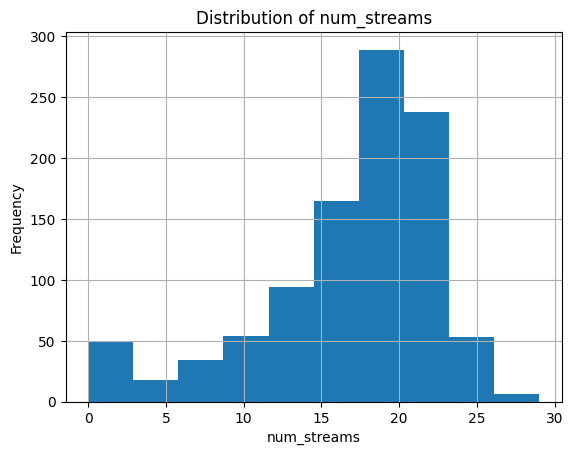

In [152]:
df_ns_after = df_after["num_streams"].hist(bins = 10)
plt.xlabel("num_streams")
plt.ylabel("Frequency")
plt.title("Distribution of num_streams")
plt.show()

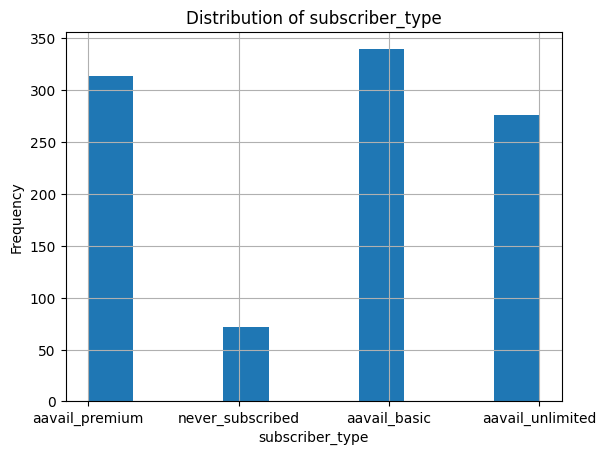

In [153]:
df_ns_before = df_after["subscriber_type"].hist(bins = 10)
plt.xlabel("subscriber_type")
plt.ylabel("Frequency")
plt.title("Distribution of subscriber_type")
plt.show()

In [154]:
df_after["num_streams"].describe()

count    1000.0000
mean       16.9630
std         5.9524
min         0.0000
25%        15.0000
50%        18.0000
75%        21.0000
max        29.0000
Name: num_streams, dtype: float64

In [155]:
df_after["subscriber_type"].describe()

count             1000
unique               4
top       aavail_basic
freq               339
Name: subscriber_type, dtype: object

By analyzing the plots from before and after i can say that for num_streams and subscriber type, i have imputed the values correctly. Because 
    * i did not disrupted the original frequency  
    * Preserve existing category proportions
    * Not change the relative balance among original categories
    * Makes missingness visible

In [156]:
import seaborn as sns
df_after

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams
0,1,united_states,21.0,Kasen Todd,True,aavail_premium,23.0
1,2,singapore,31.0,Ensley Garza,False,never_subscribed,12.0
2,3,united_states,22.0,Lillian Carey,False,aavail_premium,22.0
3,4,united_states,21.0,Beau Christensen,True,aavail_basic,19.0
4,5,singapore,22.0,Ernesto Gibson,True,aavail_premium,23.0
...,...,...,...,...,...,...,...
995,996,singapore,55.0,Peyton Enriquez,False,aavail_unlimited,14.0
996,997,united_states,23.0,Amina Manning,True,aavail_basic,24.0
997,998,united_states,25.0,Brooks Ventura,True,aavail_unlimited,17.0
998,999,united_states,40.0,Nayeli Mathis,True,aavail_unlimited,16.0


In [230]:
plot_df = (
    df_after
    .groupby(["country_name", "subscriber_type"])["num_streams"]
    .mean()
    .reset_index()
)
plot_df

,country_name,subscriber_type,num_streams
0,singapore,aavail_basic,15.256881
1,singapore,aavail_premium,12.185185
2,singapore,aavail_unlimited,14.157303
3,singapore,never_subscribed,14.666667
4,united_states,aavail_basic,17.504348
5,united_states,aavail_premium,18.267241
6,united_states,aavail_unlimited,18.983957
7,united_states,never_subscribed,18.254902


In [237]:
plot_pivot = plot_df.pivot(
    index="subscriber_type",
    columns="country_name",
    values="num_streams"
)
plot_pivot

country_name,singapore,united_states
subscriber_type,,
aavail_basic,15.256881,17.504348
aavail_premium,12.185185,18.267241
aavail_unlimited,14.157303,18.983957
never_subscribed,14.666667,18.254902


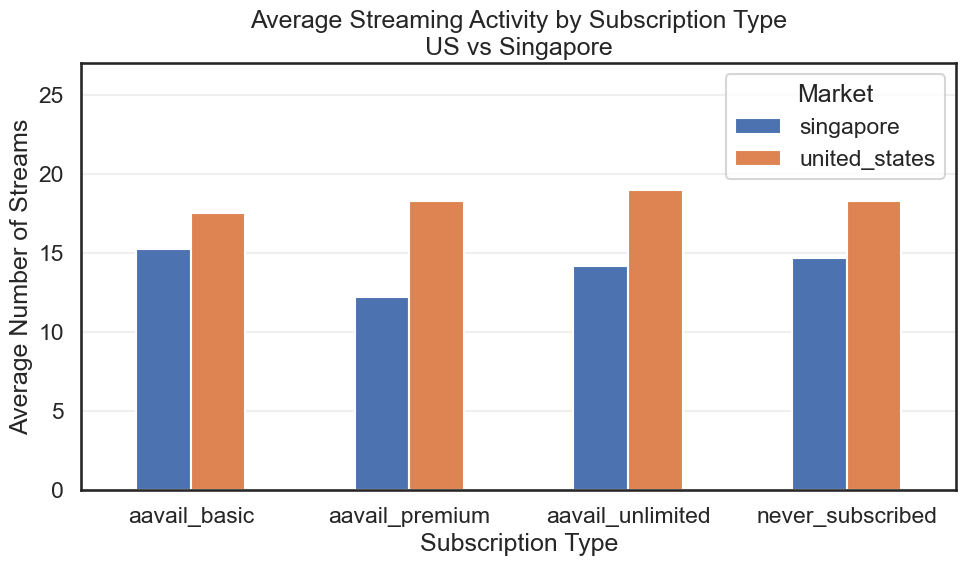

In [212]:
plot_pivot.plot(
    kind="bar",
    figsize=(10,6)
)

plt.title("Average Streaming Activity by Subscription Type\nUS vs Singapore")
plt.xlabel("Subscription Type")
plt.ylabel("Average Number of Streams")
plt.xticks(rotation=0)
plt.legend(title="Market")
plt.ylim(0,27)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

In [239]:
plot_df2 = df_after.groupby(["country_name", "is_subscriber", "age_group"]).size().reset_index(name = "count")
plot_df2

/var/folders/rl/_03jcnn9787dwzw6mgmq1_600000gn/T/ipykernel_80096/881757232.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_df2 = df_after.groupby(["country_name", "is_subscriber", "age_group"]).size().reset_index(name = "count")


,country_name,is_subscriber,age_group,count
0,singapore,False,"(18, 25]",98
1,singapore,False,"(25, 35]",31
2,singapore,False,"(35, 45]",28
3,singapore,False,"(45, 55]",11
4,singapore,False,"(55, 65]",0
5,singapore,True,"(18, 25]",67
6,singapore,True,"(25, 35]",18
7,singapore,True,"(35, 45]",20
8,singapore,True,"(45, 55]",6
9,singapore,True,"(55, 65]",0


In [244]:
plot_df2["percentage"] = (
    plot_df2
    .groupby(["country_name", "is_subscriber"])["count"]
    .transform(lambda x: (x / x.sum())*100)
)
plot_df2


,country_name,is_subscriber,age_group,count,percentage
0,singapore,False,"(18, 25]",98,58.333333
1,singapore,False,"(25, 35]",31,18.452381
2,singapore,False,"(35, 45]",28,16.666667
3,singapore,False,"(45, 55]",11,6.547619
4,singapore,False,"(55, 65]",0,0.000000
5,singapore,True,"(18, 25]",67,60.360360
6,singapore,True,"(25, 35]",18,16.216216
7,singapore,True,"(35, 45]",20,18.018018
8,singapore,True,"(45, 55]",6,5.405405
9,singapore,True,"(55, 65]",0,0.000000


In [245]:
plot_pivot2 = plot_df2.pivot(
    index = "age_group",
    columns = ["country_name", "is_subscriber"],
    values = "percentage"
)
plot_pivot2

country_name   singapore            united_states           
is_subscriber      False      True          False      True 
age_group                                                   
(18, 25]       58.333333  60.360360     57.142857  55.913978
(25, 35]       18.452381  16.216216     20.408163  18.817204
(35, 45]       16.666667  18.018018     17.346939  19.175627
(45, 55]        6.547619   5.405405      5.102041   5.734767
(55, 65]        0.000000   0.000000      0.000000   0.358423

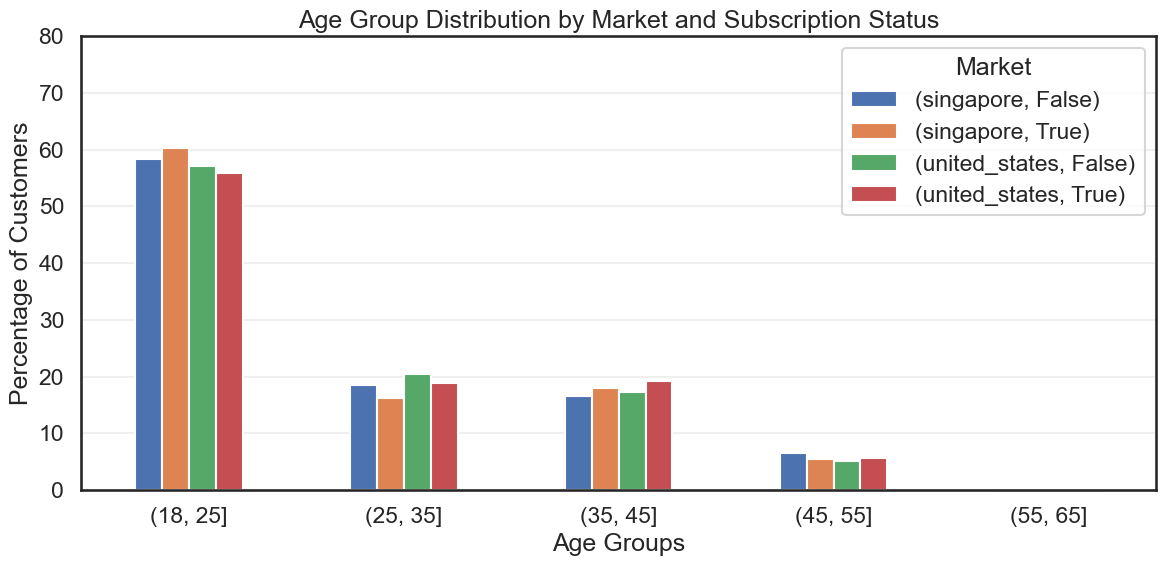

In [246]:
plot_pivot2.plot(
    kind="bar",
    figsize=(12,6)
)

plt.title("Age Group Distribution by Market and Subscription Status")
plt.xlabel("Age Groups")
plt.ylabel("Percentage of Customers")
plt.xticks(rotation=0)
plt.legend(title="Market")
plt.ylim(0,80)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

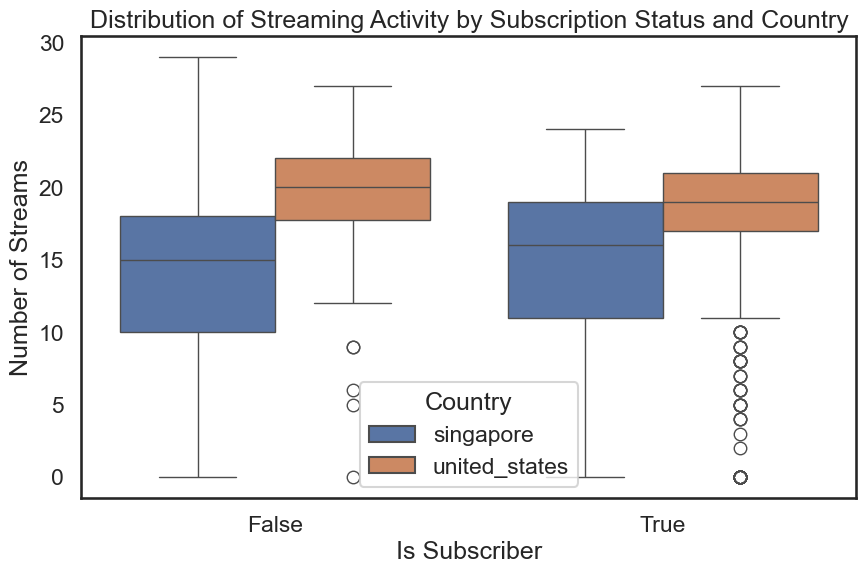

In [248]:
plt.figure(figsize=(10,6))

sns.boxplot(
    data=df_after,
    x="is_subscriber",
    y="num_streams",
    hue="country_name"
)

plt.title("Distribution of Streaming Activity by Subscription Status and Country")
plt.xlabel("Is Subscriber")
plt.ylabel("Number of Streams")
plt.legend(title="Country")
plt.show()